In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import sys

# Add the parent directory to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

import dataloader
import modules 
import plots
from trainer import Trainer
import torch 
import matplotlib.pyplot as plt

# Training a Feedforward Neural Network Model to Predict Diabetes Disease Progression

## Testing our model architecture with sythetic linear data

In [2]:
linear_dataset = dataloader.SyntheticLinearData(torch.tensor([0.25, 0.5]), 5)


In [3]:
network_architecture = [5]
model = modules.LinearReLUMLP(network_architecture, learning_rate=0.1)

/Users/patrickrowe/miniconda3/envs/main/lib/python3.12/site-packages/torch/nn/modules/lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


In [4]:
trainer = Trainer(max_epochs=10)
trainer.fit(model, linear_dataset)

Model running on cpu

 EPOCH 

Epoch 1/10, Training Loss: 4.3472
Epoch 1/10, Validation Loss: 0.1857

 EPOCH 

Epoch 2/10, Training Loss: 0.0742
Epoch 2/10, Validation Loss: 0.0146

 EPOCH 

Epoch 3/10, Training Loss: 0.0057
Epoch 3/10, Validation Loss: 0.0017

 EPOCH 

Epoch 4/10, Training Loss: 0.0021
Epoch 4/10, Validation Loss: 0.0007

 EPOCH 

Epoch 5/10, Training Loss: 0.0012
Epoch 5/10, Validation Loss: 0.0003

 EPOCH 

Epoch 6/10, Training Loss: 0.0007
Epoch 6/10, Validation Loss: 0.0001

 EPOCH 

Epoch 7/10, Training Loss: 0.0004
Epoch 7/10, Validation Loss: 0.0001

 EPOCH 

Epoch 8/10, Training Loss: 0.0003
Epoch 8/10, Validation Loss: 0.0001

 EPOCH 

Epoch 9/10, Training Loss: 0.0002
Epoch 9/10, Validation Loss: 0.0001

 EPOCH 

Epoch 10/10, Training Loss: 0.0002
Epoch 10/10, Validation Loss: 0.0001


In [6]:
y_hat = []
y = []

for batch in linear_dataset.val_dataloader():
    y_hat.extend(model.net(batch[0]).detach().numpy())
    y.extend(batch[-1])

print(y)
print(y_hat)

[tensor([5.2736]), tensor([5.2178]), tensor([5.7683]), tensor([5.5373]), tensor([5.6640]), tensor([5.0036]), tensor([5.5003]), tensor([5.1801]), tensor([5.2558]), tensor([4.8163]), tensor([4.6339]), tensor([4.4426]), tensor([5.7869]), tensor([5.4765]), tensor([5.0700]), tensor([4.5780]), tensor([5.0664]), tensor([5.1474]), tensor([6.2033]), tensor([4.8549]), tensor([5.3158]), tensor([5.5395]), tensor([5.3154]), tensor([5.7094]), tensor([4.7350]), tensor([4.6523]), tensor([5.2292]), tensor([4.4581]), tensor([5.3574]), tensor([5.7976]), tensor([6.0515]), tensor([4.6010]), tensor([5.4663]), tensor([4.9071]), tensor([4.4337]), tensor([4.4107]), tensor([5.0470]), tensor([5.2971]), tensor([5.3795]), tensor([4.5901]), tensor([5.7094]), tensor([4.0881]), tensor([4.8411]), tensor([5.1829]), tensor([5.0539]), tensor([5.1205]), tensor([5.9469]), tensor([4.9306]), tensor([5.2508]), tensor([4.9424]), tensor([5.0112]), tensor([5.5361]), tensor([4.7109]), tensor([4.5324]), tensor([5.1651]), tensor([5

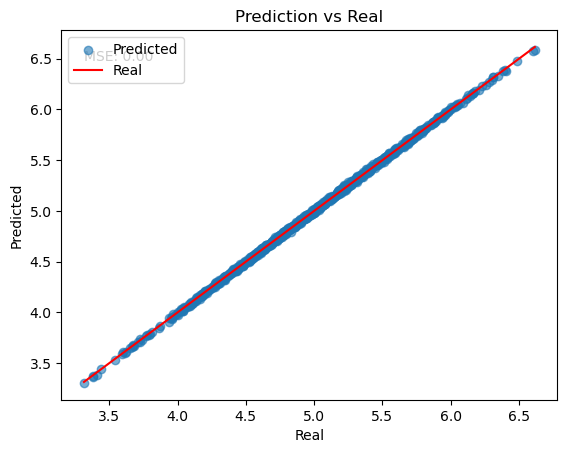

In [7]:
def plot_prediction_vs_real(y_hat, y):
    plt.figure()
    preds = [p.item() for p in y_hat]
    reals = [r.item() for r in y]

    plt.scatter(reals, preds, alpha=0.6, label='Predicted')

    mse = sum((p - r)**2 for p, r in zip(preds, reals)) / len(reals)

    plt.plot([min(reals), max(reals)], [min(reals), max(reals)], color='red', label='Real')

    plt.title('Prediction vs Real')
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.text(min(reals), max(preds), f"MSE: {mse:.2f}", ha='left', va='top')
    plt.legend()
    plt.show()

plot_prediction_vs_real(y_hat, y)